In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Two types of windows
-Rectangle window
$$\begin{equation*}\omega(n) = \begin{cases} 1 &\text{n $\in\left[ 0, N-1 \right]$}\\ 0 &\text{n $\notin\left[ 0, N-1 \right]$}\end{cases}\end{equation*}$$
-Hann window
$$\omega(n)=0.5\left(1 - cos(\frac{2\pi n}{N -1})\right)$$

In [193]:
def rectangleWindow(n, N):
	return 1 if 0 <= n < N else 0

In [194]:
def hannWindow(n, N):
	return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

In [195]:
def DFT(f, window):
	N = f.size

	Fx = np.zeros_like(f, dtype=complex)

	for k in range(N):
		for n in range(N):
			Fx[k] += f[n] * window(n - k, N) * np.exp(1j * (2 * np.pi / N) * k * n)
	return Fx

In [196]:
(a0, a1) = (1, 0.002)

w0 = 5.1
w1 = 5 * w0

fs = 1000
n = 1000
T = 2 * np.pi * np.arange(n) / fs
frequencies = np.linspace(0, fs / 2, int(n / 2))

## $f(t)=a_{0}sin(\omega_{0}t)+a_{1}sin(\omega_{1}t)$

In [197]:
f = a0 * np.sin(w0 * T) + a1 * np.sin(w1 * T)

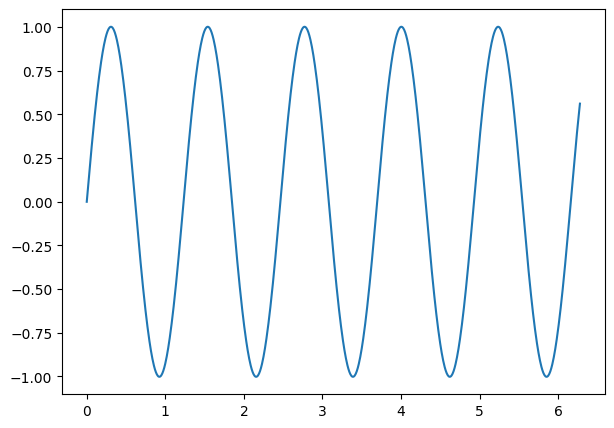

In [198]:
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(T, f)
plt.show()

In [199]:
spectrumRectangle = DFT(f, rectangleWindow)[:frequencies.size]
spectrumHann = DFT(f, hannWindow)[:frequencies.size]

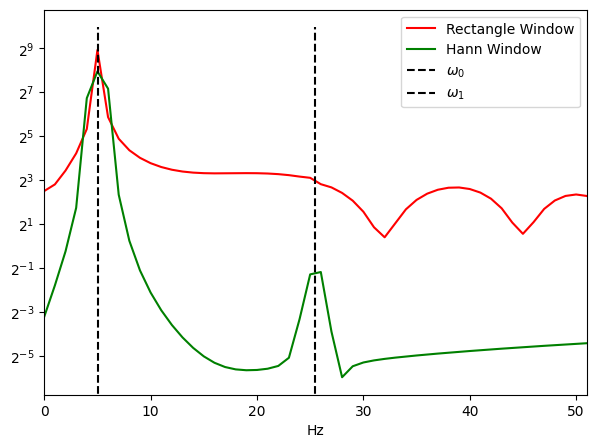

In [200]:
plt.figure(figsize=(7, 5), dpi=100)

plt.plot(np.abs(spectrumRectangle), label='Rectangle Window', c='r')
plt.plot(np.abs(spectrumHann), label='Hann Window', c='g')
plt.vlines(w0, 0, 1000, linestyles='--', label=f'$\omega_{0}$', colors='k')
plt.vlines(w1, 0, 1000, linestyles='--', label=f'$\omega_{1}$', colors='k')
plt.xlim([0, max(w0, w1) * 2])

plt.xlabel("Hz")

plt.yscale('log', base=2)

plt.legend()

plt.show()